# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 29 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. **Пожалуйста, не стирайте условия задач и не переименовывайте ноутбук!**

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')
np.random.seed(42)

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [15]:
theta = 10
n = 100
al = 0.95
quant_minus = sps.norm.ppf((1-al)/2)
quant_plus = sps.norm.ppf((1+al)/2)

In [16]:
def draw_confidence_interval(sam, theta, estimation, lower, upper, title, est_lab, lim):
    plt.figure(figsize =  (16, 9))
    plt.plot(np.arange(len(sample)) + 1, estimation, color = 'blue', linewidth = 2.5, label = est_lab)
    plt.hlines(theta, xmin = 1, xmax = len(sam) + 1, color = 'red', label = fr'$\theta$')
    plt.scatter(np.arange(len(sample)) + 1, sam, label = 'Значения выборки')
    plt.fill_between(np.arange(len(sample)) + 1, lower, upper, alpha = 0.2)
    plt.legend()
    plt.xlabel('Мощность выборки')
    plt.ylim(lim)
    plt.ylabel('Значения')
    plt.title(title)
    plt.show()

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

Во всем задании  $u_{\alpha}$ -- $\alpha$ квантиль стандартного нормального распределения.

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Доверительный интервал уровня $\alpha$ будет равен
$$
\Big(X_{(n)} , X_{(n)} \cdot \frac{1}{1 - \frac{v_\alpha}{n}} \Big)
$$
где $v_{\alpha}$ -- квантиль экспоненциального распределения.

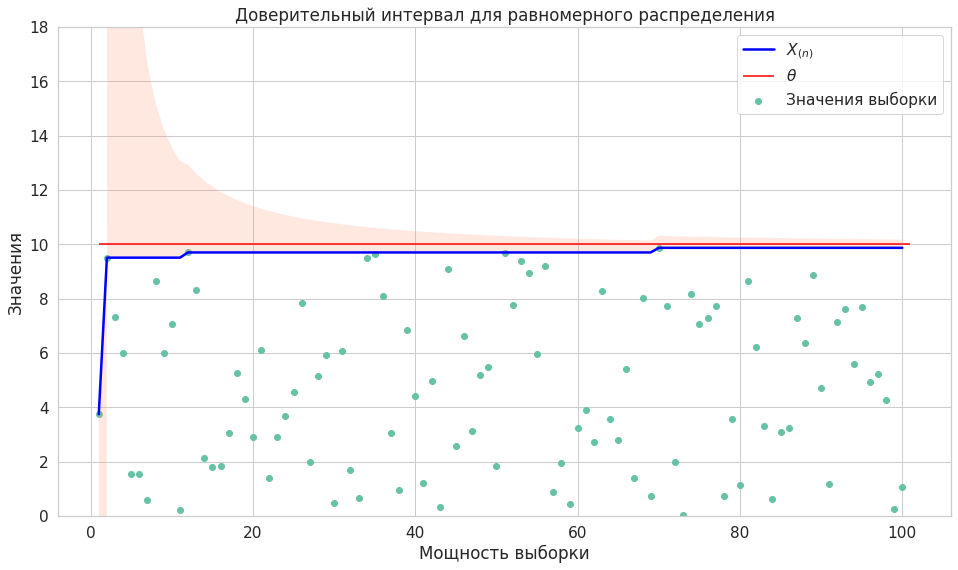

In [17]:
sample = sps.uniform.rvs(scale = theta, size = n)
est = np.maximum.accumulate(sample)
lower = est
upper = est / (1 - sps.expon.ppf(al)/ (np.arange(n) + 1))
draw_confidence_interval(sample, theta, est, lower, upper,
                        'Доверительный интервал для равномерного распределения', r'$X_{(n)}$', (0, 18))

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Из метода выборочных квантилей, имеем
$$
\sqrt{n}(\bar\mu - \theta) \to N(0, \frac{\pi^2}{4})
$$
Откуда получаем, что доверительный интервал уровня $\alpha$ будет равен
$$
\Big(\bar\mu - \frac{\pi}{2\sqrt{n}}u_{\frac{1 + \alpha}{2}}, \bar\mu - \frac{\pi}{2\sqrt{n}}u_{\frac{1 - \alpha}{2}} \Big)
$$

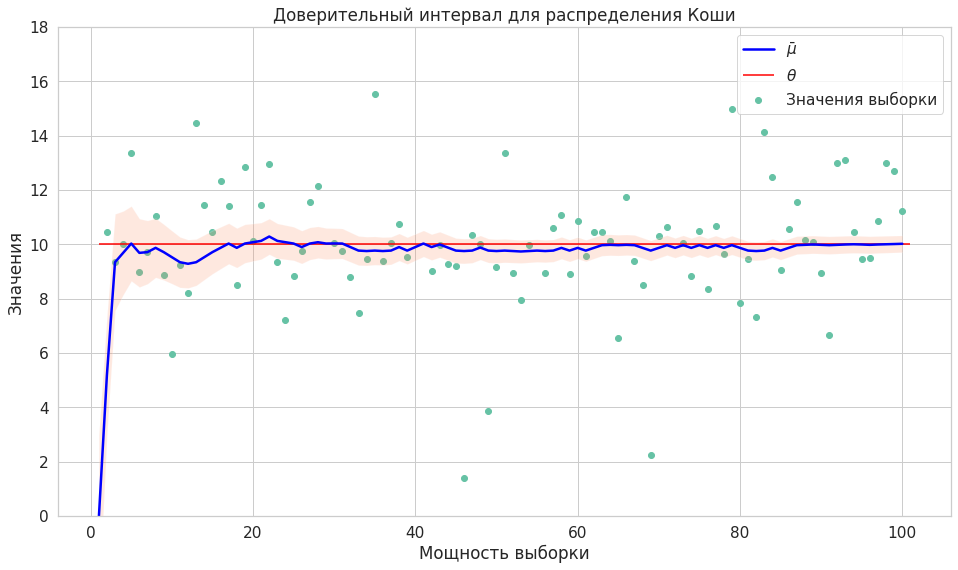

In [18]:
sample = sps.cauchy.rvs(theta, size=n)
est = np.array([np.median(sample[:i]) for i in np.arange(n) + 1])
lower = est - (np.pi / (2 * np.sqrt(np.arange(n)  + 1))) * quant_plus
upper = est - (np.pi / (2 * np.sqrt(np.arange(n)  + 1))) * quant_minus
draw_confidence_interval(sample, theta, est, lower, upper,
                        'Доверительный интервал для распределения Коши', fr'$\bar\mu$', (0, 18))

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Согласно ЦПТ, имеем 
$$
\sqrt{n}(\bar{X} - \theta) \to N(0, \theta)
$$
Откуда, используя лемму Слуцкого, имеем,что доверительный интервал уровня  $\alpha$  будет равен
$$
\Big(\bar{X} - \sqrt{\frac{\bar{X}}{n}}u_{\frac{1 + \alpha}{2}}, \bar{X} - \sqrt{\frac{\bar{X}}{n}}u_{\frac{1 - \alpha}{2}}\Big)
$$

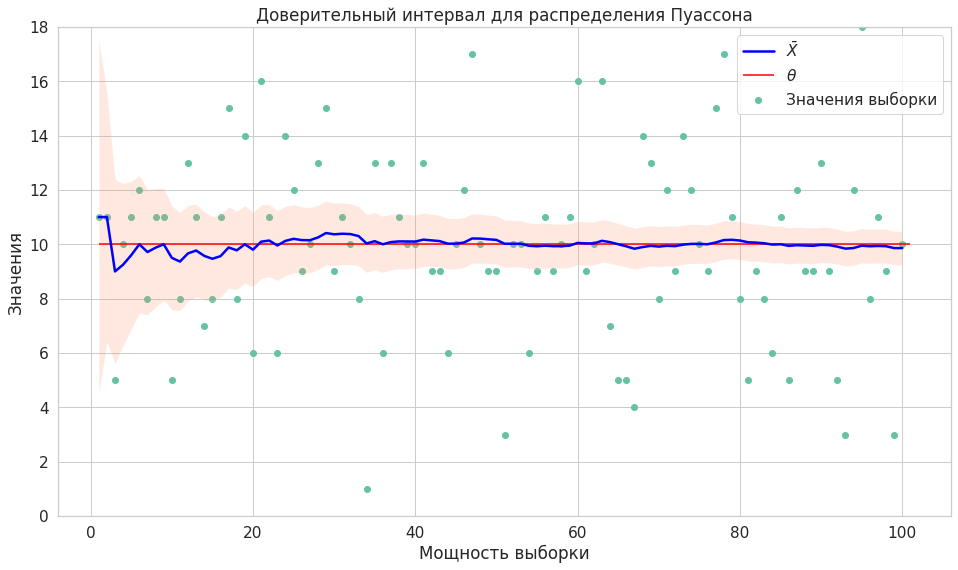

In [19]:
sample = sps.poisson.rvs(theta, size=n)
est = np.cumsum(sample) / (np.arange(n) + 1)
lower = est - (np.sqrt(est) / np.sqrt(np.arange(n) + 1)) * quant_plus
upper = est - (np.sqrt(est) / np.sqrt(np.arange(n) + 1)) * quant_minus
draw_confidence_interval(sample, theta, est, lower, upper,
                        'Доверительный интервал для распределения Пуассона', r'$\bar{X}$', (0, 18))

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Из ЦПТ имеем
$$
\sqrt{n} (\bar{X} - \lambda\theta) \to N(0, \lambda\theta^2)
$$
Откуда имеем,что доверительный интервал уровня  $\alpha$ для $\theta$ при известном $\gamma$ будет равен
$$
\Big( \frac{\bar{X}}{\sqrt{\frac{\lambda}{n}}u_{\frac{1 + \alpha}{2}} + \lambda}, \frac{\bar{X}}{\sqrt{\frac{\lambda}{n}}u_{\frac{1 - \alpha}{2}} + \lambda} \Big)
$$
При этом, важно понимать, что оценкой для $\theta$ будет $\frac{\bar{X}}{\lambda}$

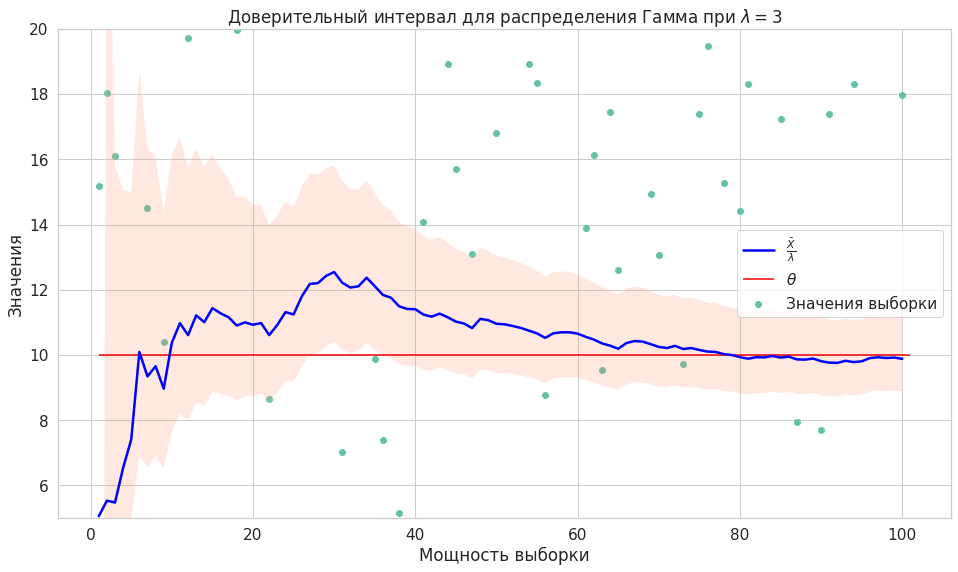

In [20]:
lam = 3
sample = sps.gamma.rvs(scale = theta, a = lam, size = n)
mean = np.cumsum(sample) / (np.arange(n) + 1) 
est = mean / lam
lower =  mean / (lam + (np.sqrt(lam) / np.sqrt(np.arange(n) + 1)) *quant_plus)
upper = mean / (lam + (np.sqrt(lam) / np.sqrt(np.arange(n) + 1)) *quant_minus)
draw_confidence_interval(sample,  theta, est, lower, upper,
                        'Доверительный интервал для распределения Гамма при $\lambda = 3$', 
                         r'$\frac{\barX}{\lambda}$', (5, 20))

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

**Вывод:**
Во-первых, все построенные интервалы являются асимптотическими, поэтому пока размер выборки достаточно маленький, интервал может не содержать истинное значение параметра.
Также, все интервалы, кроме первого, имеют скорость сходимости $O(\frac{1}{\sqrt{n}})$. Первый же интервал имеет скорость скорость сходимости $O(\frac{1}{n})$.Также, первый доверительный интервал отличается тем, что является одностороним.
Также, доверительные интервалы 2 и 3 являются симметричными. А вот доверительный интервал Гамма-распределения не является симметричным, он имеет большую ширину сверху.

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__ Нужно рассмотреть доверительный интервал распределения бернулли. Он равен
$$
\Big( \bar{X} - \sqrt{\frac{\bar{X}(1 - \bar{X}}{n}}\cdot u_{\frac{1 + \alpha}{2}}, \bar{X} - \sqrt{\frac{\bar{X}(1 - \bar{X}}{n}}\cdot u_{\frac{1 - \alpha}{2}}\Big)
$$
Так как $u_{\frac{1 + \alpha}{2}}$ приблизительно равно $1.96$, а $\bar{X}(1 - \bar{X} \leq 0.25$, то ширина полуинтервала приблизительно равна $\frac{1.96 * 0.5}{\sqrt{n}} \approx \frac{1}{\sqrt{n}} $. Так как $\alpha = 0.95$, мы хотим получить ошибку в худшим случае в 3-4 знаке, а следовательно $\frac{1}{\sqrt{n}} \leq 10^{-3} \Leftrightarrow n \geq 10^6$.

In [21]:
num_samples = 1e6

### Равномерное распределение

In [22]:
samples = sps.uniform.rvs(scale = theta, size=(int(num_samples), int(n)))
est = np.max(samples, axis = 1)
lower = est
upper = est / (1 - sps.expon.ppf(al)/n)
proba = np.logical_and(lower < theta, theta < upper).sum() / num_samples
print(f'Вероятность равна {np.round(proba, 2)}')

Вероятность равна 0.95


### Распределение Коши

In [23]:
samples = sps.cauchy.rvs(theta, size=( int(num_samples), int(n)))
est = np.median(samples,axis = 1)
lower = est - (np.pi / (2 * np.sqrt(n))) * quant_plus
upper = est - (np.pi / (2 * np.sqrt(n))) * quant_minus
proba = np.logical_and(lower < theta, theta < upper).sum() / num_samples
print(f'Вероятность равна {np.round(proba, 2)}')

Вероятность равна 0.95


### Распределение Пуассона

In [24]:
samples = sps.poisson.rvs(theta, size=(int(num_samples), int(n)))
est = np.mean(samples, axis = 1)
lower = est - (np.sqrt(est) / np.sqrt(n)) * quant_plus
upper = est - (np.sqrt(est) / np.sqrt(n)) * quant_minus
proba = np.logical_and(lower < theta, theta < upper).sum() / num_samples
print(f'Вероятность равна {np.round(proba, 2)}')

Вероятность равна 0.95


### Гамма-распределение

In [25]:
samples = sps.gamma.rvs(scale = theta, a = lam,  size=(int(num_samples), int(n)))
mean = np.mean(samples, axis = 1) 
est = mean / lam
lower =  mean / (lam + (np.sqrt(lam) / np.sqrt(n)) *quant_plus)
upper = mean / (lam + (np.sqrt(lam) / np.sqrt(n)) *quant_minus)
proba = np.logical_and(lower < theta, theta < upper).sum() / num_samples
print(f'Вероятность равна {np.round(proba, 2)}')

Вероятность равна 0.95


Сделайте выводы.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Формула для точного доверительного интервала уровня $\alpha$:
$$
\Big(\bar{X} - T_{n - 1, \frac{1+\alpha}{2}} \frac{S}{\sqrt{n - 1}},\bar{X} + T_{n - 1, \frac{1+\alpha}{2}} \frac{S}{\sqrt{n - 1}}\Big)
$$

Формула для асимптотического доверительного интервала уровня $\alpha$:
$$
\Big(\bar{X} - \frac{S}{\sqrt{n}} \cdot u_{\frac{1 + \alpha}{2}}, \bar{X} - \frac{S}{\sqrt{n}} \cdot u_{\frac{1 - \alpha}{2}} \Big)
$$

Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [26]:
def calculate_conf_interval(
    sample, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    stud_quant = sps.t.ppf((1 + alpha) / 2, len(sample) - 1)
    return [np.mean(sample) - (np.sqrt(np.var(sample)) * stud_quant) / np.sqrt(len(sample) - 1), \
            np.mean(sample) + (np.sqrt(np.var(sample)) * stud_quant) / np.sqrt(len(sample) - 1) ]

In [27]:
def calculate_asymptotic_conf_interval(
    sample, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    return [np.mean(sample) - (np.sqrt(np.var(sample))/ np.sqrt(len(sample))) * quant_plus, \
           np.mean(sample) - (np.sqrt(np.var(sample))/ np.sqrt(len(sample))) * quant_minus]

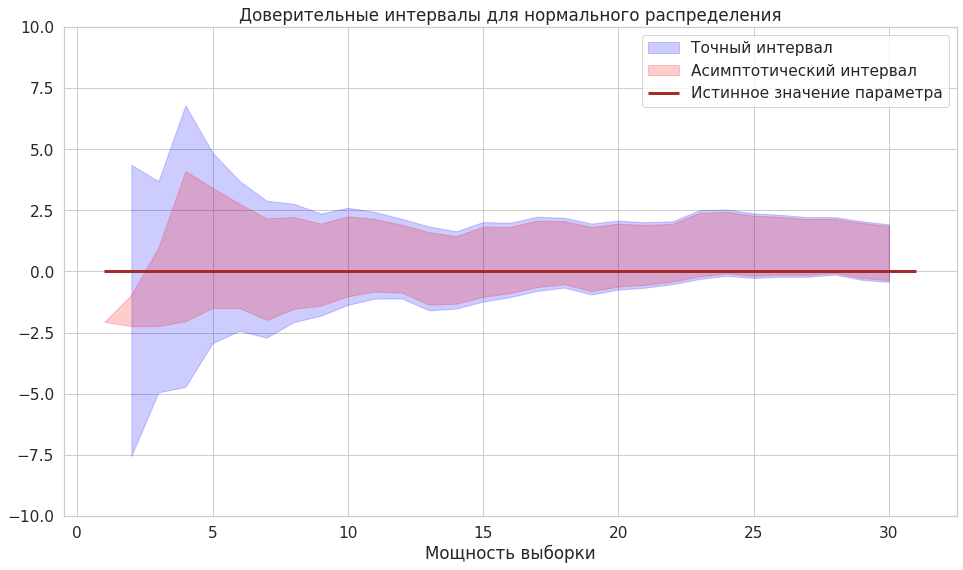

In [28]:
n = 30
sample = sps.norm(0, 3).rvs(size=n)
conf_inter = np.array([calculate_conf_interval(sample[:sz]) for sz in np.arange(n) + 1])
low_conf, up_conf = conf_inter[:, 0], conf_inter[:, 1]
asymp_conf_inter = np.array([calculate_asymptotic_conf_interval(sample[:sz]) for sz in np.arange(n) + 1])
low_asymp, up_asymp = asymp_conf_inter[:, 0], asymp_conf_inter[: , 1]


plt.figure(figsize = (16 , 9))
plt.fill_between(np.arange(n) + 1, low_conf, up_conf, alpha=0.2, color='blue', label='Точный интервал')
plt.fill_between(np.arange(n) + 1, low_asymp, up_asymp, alpha=0.2,color='red',label='Асимптотический интервал')
plt.hlines(0, xmin = 1, xmax = n + 1, color='brown', label='Истинное значение параметра', linewidth = 3)
plt.xlabel('Мощность выборки')
plt.title('Доверительные интервалы для нормального распределения')
plt.ylim(-10, 10)
plt.legend()
plt.show()


Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

Начиная с размера выборки, равной 8, точный и асимптотический доверительные интервалы отличаются незначительно.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [29]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: /home/mrkakek/stats/city_day.csv
100%|██████████████████████████████████████| 2.57M/2.57M [00:00<00:00, 13.4MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [30]:
city_day = pd.read_csv('city_day.csv', parse_dates=['Date'])[['City', 'Date', 'AQI']].dropna()
city_day.head()

,City,Date,AQI
28,Ahmedabad,2015-01-29,209.0
29,Ahmedabad,2015-01-30,328.0
30,Ahmedabad,2015-01-31,514.0
31,Ahmedabad,2015-02-01,782.0
32,Ahmedabad,2015-02-02,914.0


Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [31]:
datetime = pd.DatetimeIndex(city_day['Date'])
city_day['Month'], city_day['Year'] = datetime.month, datetime.year
city_day.head()

,City,Date,AQI,Month,Year
28,Ahmedabad,2015-01-29,209.0,1,2015
29,Ahmedabad,2015-01-30,328.0,1,2015
30,Ahmedabad,2015-01-31,514.0,1,2015
31,Ahmedabad,2015-02-01,782.0,2,2015
32,Ahmedabad,2015-02-02,914.0,2,2015


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [32]:
mumbai = city_day[(pd.Timestamp(2018, 7, 1) <= city_day['Date']) & (city_day['City'] == 'Mumbai')]
kolkata = city_day[(pd.Timestamp(2018, 7, 1) <= city_day['Date']) & (city_day['City'] == 'Kolkata')]

In [33]:
mumbai.head()

,City,Date,AQI,Month,Year
23132,Mumbai,2018-07-01,88.0,7,2018
23133,Mumbai,2018-07-02,77.0,7,2018
23134,Mumbai,2018-07-03,89.0,7,2018
23135,Mumbai,2018-07-04,75.0,7,2018
23136,Mumbai,2018-07-05,68.0,7,2018


In [34]:
kolkata.head()

,City,Date,AQI,Month,Year
19114,Kolkata,2018-07-01,58.0,7,2018
19115,Kolkata,2018-07-02,62.0,7,2018
19116,Kolkata,2018-07-03,50.0,7,2018
19117,Kolkata,2018-07-04,58.0,7,2018
19118,Kolkata,2018-07-05,57.0,7,2018


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [22]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    return df[(df['Year'] == year) & (df['Month'] == month)]

In [23]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    return np.random.choice(sample, k * len(sample)).reshape(k , len(sample))

In [24]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
    k = 1000
):
    """ Построение бутстрепных доверительных интервалов. """
    
    bootstrap_samp = get_bootstrap_samples(sample)
    est_vals = np.sort(estimator(bootstrap_samp))
    low, up = int((1 - alpha) * k / 2), int(np.ceil((1 + alpha) * k / 2))
    return [est_vals[low], est_vals[up]]

In [25]:
# YOUR CODE GOES HERE

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

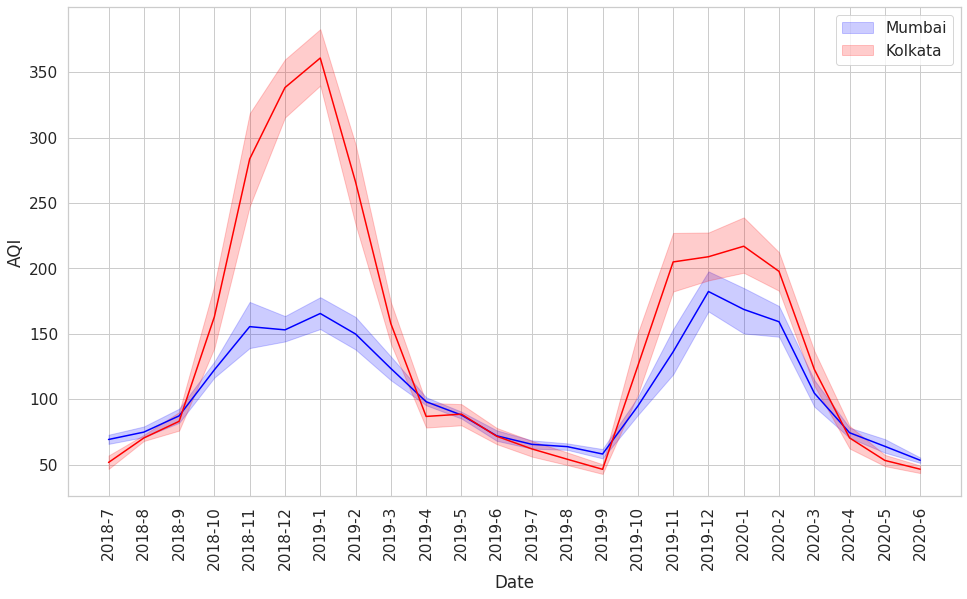

In [26]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 


mum_inter = np.array([bootstrap_conf_interval(get_dataset_by_month(mumbai, y, m)["AQI"]) for y, m in ym])
mum_low, mum_up = mum_inter[:, 0], mum_inter[:, 1]
mum_mean = np.array([np.mean(get_dataset_by_month(mumbai, y, m)["AQI"]) for y, m in ym])

kol_inter = np.array([bootstrap_conf_interval(get_dataset_by_month(kolkata, y, m)["AQI"]) for y, m in ym])
kol_low, kol_up = kol_inter[:, 0], kol_inter[:, 1]
kol_mean = np.array([np.mean(get_dataset_by_month(kolkata, y, m)["AQI"]) for y, m in ym])

plt.figure(figsize = (16 , 9))
plt.fill_between(labels, mum_low, mum_up, alpha = 0.2, color = 'blue', label = "Mumbai")
plt.fill_between(labels, kol_low, kol_up, alpha = 0.2, color = 'red', label = "Kolkata")
plt.plot(labels, mum_mean, color = 'blue')
plt.plot(labels, kol_mean, color = 'red')
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("AQI")
plt.legend()
plt.show()



Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Как можно заметить, в летний период AQI меньше, чем в зимний, то есть воздух лучше летом. Связано это может быть с тем, что летом в данных городах идет сезон влажных масс и дождей. 
Информация взята из https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B8%D0%BC%D0%B0%D1%82_%D0%98%D0%BD%D0%B4%D0%B8%D0%B8

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [27]:
def make_plot(xticks, low_2019, up_2019, low_2020, up_2020, mean_2019, mean_2020, dataset):
    plt.figure(figsize = (16, 9))
    plt.fill_between(xticks, low_2019 * np.ones(len(xticks)), up_2019 * np.ones(len(xticks)), alpha = 0.2,
                    color = 'blue', label = '2019 год')
    plt.fill_between(xticks, low_2020 * np.ones(len(xticks)), up_2020 * np.ones(len(xticks)), alpha = 0.2,
                    color = 'red', label = '2020 год')
    plt.scatter(xticks, get_dataset_by_month(dataset, 2019, 4)["AQI"], color = 'blue')
    plt.scatter(xticks, get_dataset_by_month(dataset, 2020, 4)["AQI"], color = 'red')
    plt.hlines(mean_2019, xmin = 1, xmax = len(xticks), color = 'blue', linewidth = 3)
    plt.hlines(mean_2020, xmin = 1, xmax = len(xticks), color = 'red', linewidth = 3)
    plt.xlabel('День в месяце')
    plt.ylabel('AQI')
    plt.title('Доверительные интервалы чистоты воздуха в Мумбаи в апреле 2019 и 2020 годов')
    plt.xticks(xticks)
    plt.legend()
    plt.show()


In [28]:
low_2019, up_2019 = bootstrap_conf_interval(get_dataset_by_month(mumbai, 2019, 4)["AQI"])
low_2020, up_2020 = bootstrap_conf_interval(get_dataset_by_month(mumbai, 2020, 4)["AQI"])
mean_2019 = np.mean(get_dataset_by_month(mumbai, 2019, 4)["AQI"])
mean_2020 = np.mean(get_dataset_by_month(mumbai, 2020, 4)["AQI"])

In [29]:
print(len(get_dataset_by_month(mumbai, 2020, 4)))
xticks = list(range(1, 31))

30


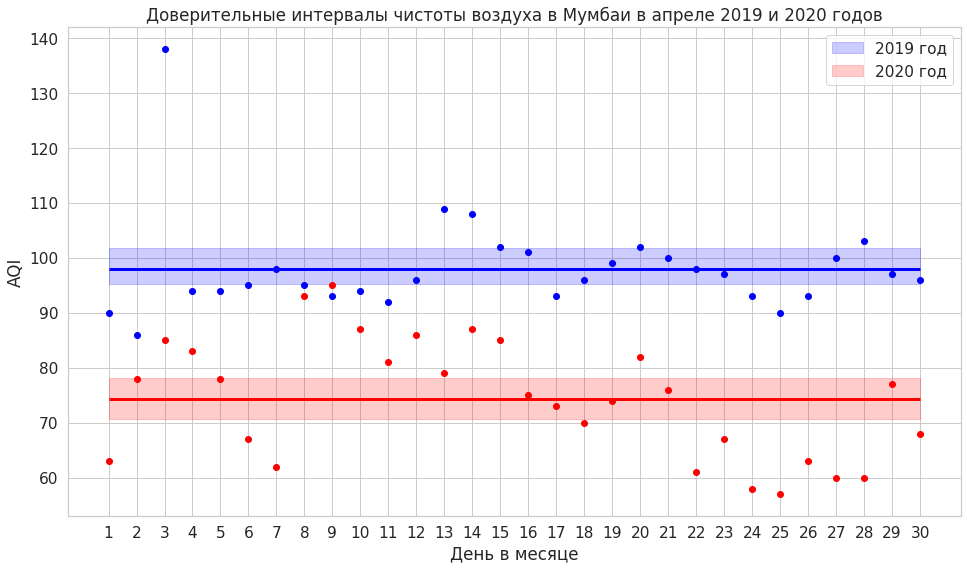

In [30]:
make_plot(xticks, low_2019, up_2019, low_2020, up_2020, mean_2019, mean_2020, mumbai)

Теперь проделайте то же самое для Калькутты

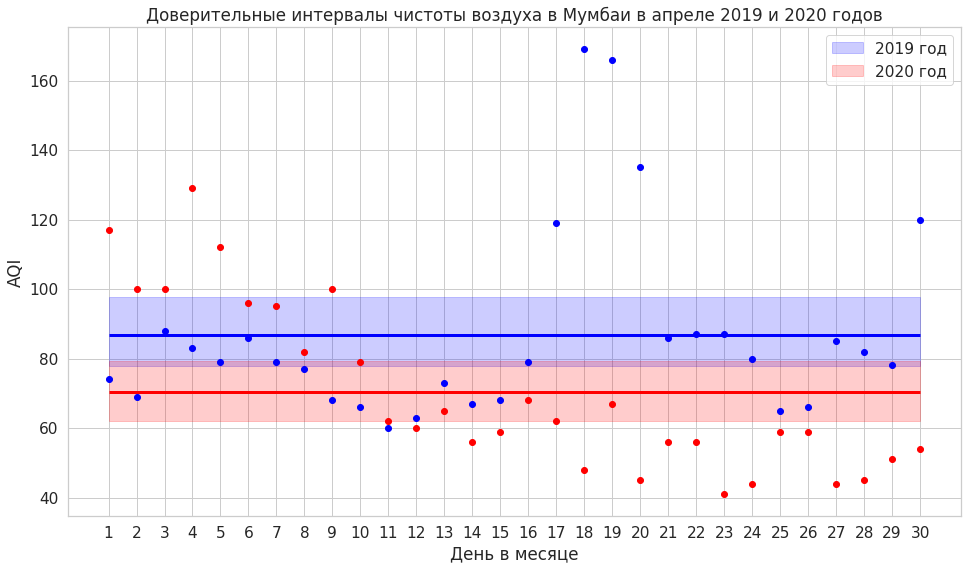

In [31]:
low_2019, up_2019 = bootstrap_conf_interval(get_dataset_by_month(kolkata, 2019, 4)["AQI"])
low_2020, up_2020 = bootstrap_conf_interval(get_dataset_by_month(kolkata, 2020, 4)["AQI"])
mean_2019 = np.mean(get_dataset_by_month(kolkata, 2019, 4)["AQI"])
mean_2020 = np.mean(get_dataset_by_month(kolkata, 2020, 4)["AQI"])

make_plot(xticks, low_2019, up_2019, low_2020, up_2020, mean_2019, mean_2020, kolkata)

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

**Вывод:**
Построенный вариационный ряд по факту является квантилями эмпирического распределения. Поэтому, при взятие такого доверительного интервала из вариационного ряда неплохо приближает реальный доверительный интервал.